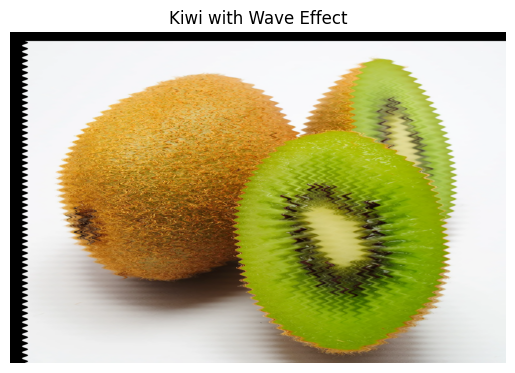

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates, rotate, gaussian_filter
import os

# Đường dẫn ảnh và lưu kết quả
input_path = r"D:\nhapmonxulyanhso\XLA_lab3\exercise\kiwi.png"
output_path = r"D:\nhapmonxulyanhso\XLA_lab3\exercise\kiwi_wave.jpg"

# Đọc ảnh
image = cv2.imread(input_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Đổi sang RGB để hiển thị đúng màu

# Tịnh tiến ảnh: tạo ảnh mới có kích thước lớn hơn
rows, cols = image.shape[:2]
translated_image = np.zeros_like(image_rgb)
M = np.float32([[1, 0, 50], [0, 1, 30]])  # Ma trận tịnh tiến (50 px phải, 30 px xuống)
translated_image = cv2.warpAffine(image_rgb, M, (cols + 50, rows + 30))

# Áp dụng hiệu ứng sóng (wave) bằng map_coordinates
def apply_wave_effect(img, amplitude=10, frequency=0.05):
    rows, cols = img.shape[:2]
    # Tạo lưới tọa độ
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    # Biến đổi sóng theo trục x
    x_wave = x + amplitude * np.sin(2 * np.pi * frequency * y)
    y_wave = y
    # Chuẩn bị chỉ số lấy mẫu
    coords = np.array([y_wave.flatten(), x_wave.flatten()])
    # Tạo ảnh mới áp hiệu ứng sóng cho từng kênh màu
    waved = np.zeros_like(img)
    for i in range(3):  # Lặp qua R,G,B
        waved[..., i] = map_coordinates(img[..., i], coords, order=1, mode='reflect').reshape(rows, cols)
    return waved

# Áp hiệu ứng wave lên ảnh đã tịnh tiến
wave_image = apply_wave_effect(translated_image)

# Lưu ảnh kết quả
wave_image_bgr = cv2.cvtColor(wave_image, cv2.COLOR_RGB2BGR)  # Đổi lại BGR để lưu
cv2.imwrite(output_path, wave_image_bgr)

# Hiển thị ảnh trên Jupyter (VSCode)
plt.imshow(wave_image)
plt.title("Kiwi with Wave Effect")
plt.axis("off")
plt.show()

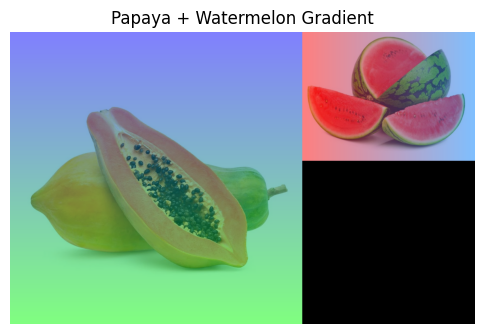

In [15]:
# === BÀI 2 ===
# Gradient màu và nền trong suốt cho đu đủ và dưa hấu
papaya = cv2.imread(os.path.join(img_dir, 'dudu.png'), cv2.IMREAD_UNCHANGED)
watermelon = cv2.imread(os.path.join(img_dir, 'duahau.png'), cv2.IMREAD_UNCHANGED)

# Đổi màu papaya: đỏ -> xanh lá
h_p, w_p = papaya.shape[:2]
grad_r2g = np.zeros_like(papaya)
for y in range(h_p):
    r = 255 - int(255 * y / h_p)
    g = int(255 * y / h_p)
    grad_r2g[y, :, :] = [r, g, 0]

papaya_grad = cv2.addWeighted(papaya[:, :, :3], 0.5, grad_r2g, 0.5, 0)

# Dưa hấu: vàng -> tím
grad_y2p = np.zeros_like(watermelon)
h_w, w_w = watermelon.shape[:2]
for x in range(w_w):
    r = int(255 * x / w_w)
    b = int(255 - 255 * x / w_w)
    grad_y2p[:, x, :] = [r, r // 2, b]

watermelon_grad = cv2.addWeighted(watermelon[:, :, :3], 0.5, grad_y2p, 0.5, 0)

# Tạo ảnh RGBA và ghép nền trong suốt
combined = np.zeros((max(h_p, h_w), w_p + w_w, 4), dtype=np.uint8)
combined[:h_p, :w_p, :3] = papaya_grad
combined[:h_p, :w_p, 3] = 255
combined[:h_w, w_p:w_p+w_w, :3] = watermelon_grad
combined[:h_w, w_p:w_p+w_w, 3] = 255

cv2.imwrite(os.path.join(img_dir, 'duahau_dudu_gradient.png'), combined)
show_image(cv2.cvtColor(combined[:, :, :3], cv2.COLOR_BGR2RGB), 'Papaya + Watermelon Gradient')

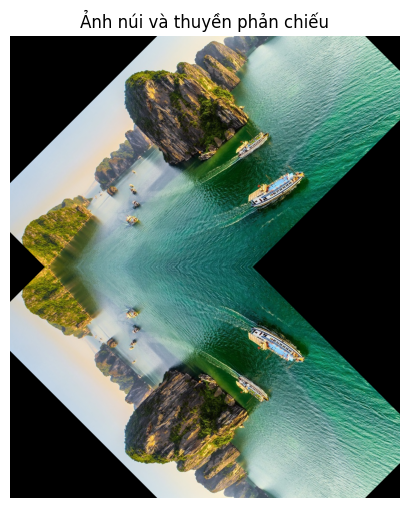

In [16]:
# === BÀI 3 ===
# Xoay + phản chiếu ảnh quang_ninh
qn_img = cv2.imread(os.path.join(img_dir, 'quang_ninh.jpg'))
qn_rgb = cv2.cvtColor(qn_img, cv2.COLOR_BGR2RGB)
qn_rotated = rotate(qn_rgb, 45, reshape=False)
qn_mirror = cv2.flip(qn_rotated, 0)  # lật dọc

canvas = np.ones((qn_rgb.shape[0]*2, qn_rgb.shape[1], 3), dtype=np.uint8) * 255
canvas[:qn_rgb.shape[0], :, :] = qn_rotated
canvas[qn_rgb.shape[0]:, :, :] = qn_mirror

cv2.imwrite(os.path.join(img_dir, 'mountain_boat_mirror.jpg'), cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR))
show_image(canvas, 'Ảnh núi và thuyền phản chiếu')

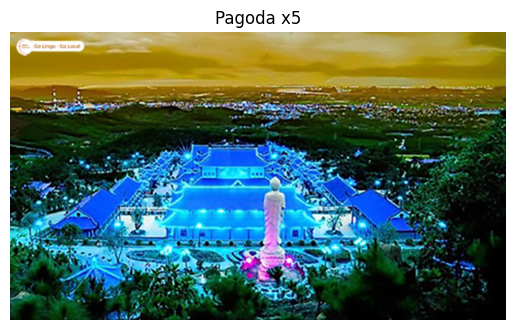

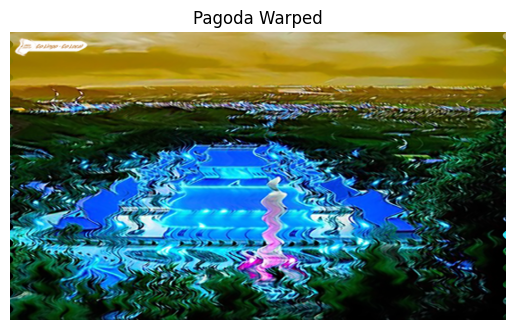

In [25]:
# === BÀI 4 ===
# Phóng to + Warp chùa
# Phóng to lên 5 lần
pagoda = cv2.imread(os.path.join(img_dir, 'pagoda.jpg'))

pagoda_zoomed = cv2.resize(pagoda, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
show_image(cv2.cvtColor(pagoda_zoomed, cv2.COLOR_BGR2RGB), 'Pagoda x5')

# Biến dạng warp bằng sin theo cột
warp_img = np.zeros_like(pagoda_up)
h, w = pagoda_up.shape[:2]
for i in range(h):
    offset = int(20 * np.sin(2 * np.pi * i / 100))
    for j in range(w):
        nj = (j + offset) % w
        warp_img[i, j] = pagoda_up[i, nj]

cv2.imwrite(os.path.join(img_dir, 'pagoda_warped.jpg'), warp_img)
show_image(cv2.cvtColor(warp_img, cv2.COLOR_BGR2RGB), 'Pagoda Warped')

Chọn ảnh:
1. duahau.png
2. dudu.png
3. kiwi.png

Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng


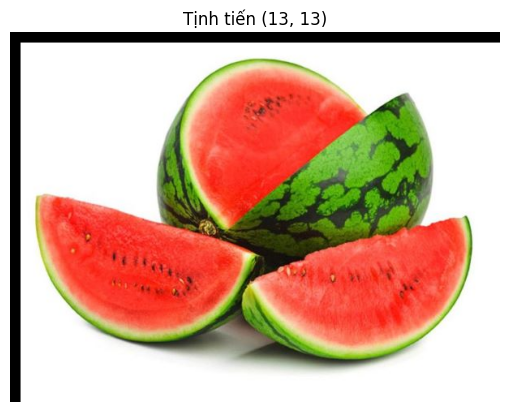

In [26]:
#bai5
def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# --- Hàm biến đổi ảnh ---
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (cols + abs(tx), rows + abs(ty)))

def rotate_image(img, angle, reshape=True):
    return rotate(img, angle, reshape=reshape, mode='reflect').astype(np.uint8)

def zoom_image(img, zoom_factor):
    return zoom(img, (zoom_factor, zoom_factor, 1), order=1).astype(np.uint8)

def gaussian_blur(img, sigma):
    return gaussian_filter(img, sigma=(sigma, sigma, 0))

def wave_transform(img, amplitude):
    rows, cols = img.shape[:2]
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    x_wave = x + amplitude * np.sin(2 * np.pi * y / 64)
    y_wave = y
    coords = np.array([y_wave.flatten(), x_wave.flatten()])
    waved = np.zeros_like(img)
    for i in range(3):
        waved[..., i] = map_coordinates(img[..., i], coords, order=1, mode='reflect').reshape(rows, cols)
    return waved

# --- Bắt đầu menu ---
image_paths = {
    "1": r"D:\nhapmonxulyanhso\XLA_lab3\exercise\duahau.png",
    "2": r"D:\nhapmonxulyanhso\XLA_lab3\exercise\dudu.png",
    "3": r"D:\nhapmonxulyanhso\XLA_lab3\exercise\kiwi.png"
}

print("Chọn ảnh:")
print("1. duahau.png")
print("2. dudu.png")
print("3. kiwi.png")
img_choice = input("Nhập số (1-3): ").strip()
img_path = image_paths.get(img_choice)

if img_path is None:
    print("Ảnh không hợp lệ.")
else:
    image = cv2.imread(img_path)
    if image is None:
        print("Không thể đọc ảnh.")
    else:
        print("\nChọn phép biến đổi:")
        print("1. Tịnh tiến")
        print("2. Xoay")
        print("3. Phóng to/thu nhỏ")
        print("4. Làm mờ Gaussian")
        print("5. Biến đổi sóng")

        choice = input("Nhập lựa chọn (1-5): ").strip()

        if choice == "1":
            tx = int(input("Nhập số pixel tịnh tiến theo trục X: "))
            ty = int(input("Nhập số pixel tịnh tiến theo trục Y: "))
            result = translate_image(image, tx, ty)
            show_image(result, f"Tịnh tiến ({tx}, {ty})")

        elif choice == "2":
            angle = float(input("Nhập góc xoay: "))
            reshape = input("Cho reshape (True/False)? ").strip().lower() == "true"
            result = rotate_image(image, angle, reshape)
            show_image(result, f"Xoay {angle} độ")

        elif choice == "3":
            zoom_factor = float(input("Nhập hệ số zoom (vd: 1.5): "))
            result = zoom_image(image, zoom_factor)
            show_image(result, f"Phóng to/thu nhỏ ({zoom_factor})")

        elif choice == "4":
            sigma = float(input("Nhập giá trị sigma (độ mờ): "))
            result = gaussian_blur(image, sigma)
            show_image(result, f"Làm mờ Gaussian (σ={sigma})")

        elif choice == "5":
            amplitude = float(input("Nhập biên độ sóng (amplitude): "))
            result = wave_transform(image, amplitude)
            show_image(result, f"Biến đổi sóng (amp={amplitude})")

        else:
            print("Lựa chọn không hợp lệ.")